In [17]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
##from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv('OnlineNewsPopularity.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(39644, 61)
['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positi

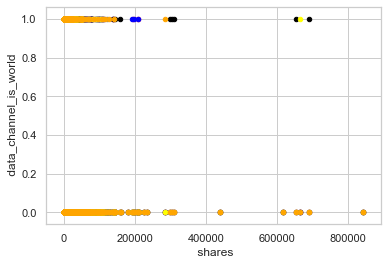

In [18]:
x1=data[' data_channel_is_lifestyle'].values
x2=data[' data_channel_is_entertainment'].values
x3=data[' data_channel_is_bus'].values
x4=data[' data_channel_is_socmed'].values
x5=data[' data_channel_is_tech'].values
x6=data[' data_channel_is_world'].values
y=data[' shares'].values

ax= plt.gca()
data.plot(kind='scatter',x=' shares',y=' data_channel_is_lifestyle',color='red',ax=ax)
data.plot(kind='scatter',x=' shares',y=' data_channel_is_entertainment',color='blue',ax=ax)
data.plot(kind='scatter',x=' shares',y=' data_channel_is_bus',color='black',ax=ax)
data.plot(kind='scatter',x=' shares',y=' data_channel_is_socmed',color='grey',ax=ax)
data.plot(kind='scatter',x=' shares',y=' data_channel_is_tech',color='yellow',ax=ax)
data.plot(kind='scatter',x=' shares',y=' data_channel_is_world',color='orange',ax=ax)
#data.plot(kind='scatter',x=' rate_positive_words',y=' data_channel_is_lifestyle',color='red',ax=ax)
#data.plot(kind='scatter',x=' rate_positive_words',y=' data_channel_is_entertainment',color='blue',ax=ax)
#data.plot(kind='scatter',x=' rate_positive_words',y=' data_channel_is_bus',color='black',ax=ax)
#data.plot(kind='scatter',x=' rate_positive_words',y=' data_channel_is_socmed',color='grey',ax=ax)
#data.plot(kind='scatter',x=' rate_positive_words',y=' data_channel_is_tech',color='yellow',ax=ax)
#data.plot(kind='scatter',x=' rate_positive_words',y=' data_channel_is_world',color='orange',ax=ax)
#data.plot(kind='scatter',x=' rate_negative_words',y=' data_channel_is_lifestyle',color='red',ax=ax)
#data.plot(kind='scatter',x=' rate_negative_words',y=' data_channel_is_entertainment',color='blue',ax=ax)
#data.plot(kind='scatter',x=' rate_negative_words',y=' data_channel_is_bus',color='black',ax=ax)
#data.plot(kind='scatter',x=' rate_negative_words',y=' data_channel_is_socmed',color='grey',ax=ax)
#data.plot(kind='scatter',x=' rate_negative_words',y=' data_channel_is_tech',color='yellow',ax=ax)
#data.plot(kind='scatter',x=' rate_negative_words',y=' data_channel_is_world',color='orange',ax=ax)
plt.show()
#data[' rate_positive_words'].mean()
#data[' rate_negative_words'].mean()

In [19]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [20]:
scores= data[[' shares']].values
results1= data[[' data_channel_is_lifestyle']].values 
results2= data[[' data_channel_is_entertainment']].values
results3= data[[' data_channel_is_bus']].values 
results4= data[[' data_channel_is_socmed']].values 
results5= data[[' data_channel_is_tech']].values 
results6= data[[' data_channel_is_world']].values 

In [21]:
passed1 = (results1==1)
failed1 = (results1==0)
passed2 = (results2==1)
failed2 = (results2==0)
passed3 = (results3==1)
failed3 = (results3==0)
passed4 = (results4==1)
failed4 = (results4==0)
passed5 = (results5==1)
failed5 = (results5==0)
passed6 = (results6==1)
failed6 = (results6==0)

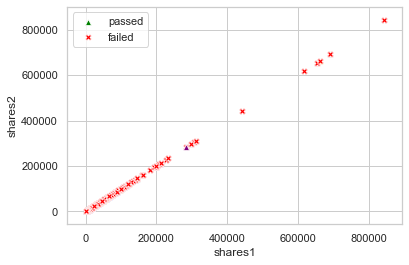

In [22]:
ax= plt.gca()
ax=sns.scatterplot(x=scores[passed1[:,0],0],y=scores[passed1[:,0],0],marker="^",color='green',ax=ax )
ax=sns.scatterplot(x=scores[failed1[:,0],0],y=scores[failed1[:,0],0],marker="X",color='red',ax=ax )
ax=sns.scatterplot(x=scores[passed2[:,0],0],y=scores[passed2[:,0],0],marker="^",color='blue',ax=ax )
ax=sns.scatterplot(x=scores[failed2[:,0],0],y=scores[failed2[:,0],0],marker="X",color='red',ax=ax )
ax=sns.scatterplot(x=scores[passed3[:,0],0],y=scores[passed3[:,0],0],marker="^",color='grey',ax=ax )
ax=sns.scatterplot(x=scores[failed3[:,0],0],y=scores[failed3[:,0],0],marker="X",color='red',ax=ax )
ax=sns.scatterplot(x=scores[passed4[:,0],0],y=scores[passed4[:,0],0],marker="^",color='orange',ax=ax )
ax=sns.scatterplot(x=scores[failed4[:,0],0],y=scores[failed4[:,0],0],marker="X",color='red',ax=ax )
ax=sns.scatterplot(x=scores[passed5[:,0],0],y=scores[passed5[:,0],0],marker="^",color='yellow',ax=ax )
ax=sns.scatterplot(x=scores[failed5[:,0],0],y=scores[failed5[:,0],0],marker="X",color='red',ax=ax )
ax=sns.scatterplot(x=scores[passed6[:,0],0],y=scores[passed6[:,0],0],marker="^",color='purple',ax=ax )
ax=sns.scatterplot(x=scores[failed6[:,0],0],y=scores[failed6[:,0],0],marker="X",color='red',ax=ax )
ax.set(xlabel='shares1', ylabel='shares2')
ax.legend(['passed','failed'])
plt.show()

In [23]:
def log (z):
   return  1 / (1 + np.exp(-z))

def sigmoid(z):
    return  1 / (1 + np.exp(-z))

def cost_r(theta, x, y):
      m = len(y)
      y_predict = log(np.dot(x,theta))
      error = (y*np.log(y_predict))+ (1-y)*np.log(1-y_predict)
      cost= -1/m * sum(error)
      gradient= 1/m * np.dot(x.transpose(), (y_predict - y))
      return cost[0], gradient

In [24]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores , axis = 0)
scores= (scores-mean_scores)/std_scores

rows = scores.shape[0]
cols = scores.shape[1]

X= np.append(np.ones((rows,1)), scores, axis = 1)
y= results1.reshape(rows,1)

theta_init=np.zeros((cols+1,1))
cost, gradient = cost_r(theta_init,X,y)

print('Cost at inital', cost)
print('gradient at inital',gradient)

Cost at inital 0.6931471805593674
gradient at inital [[ 0.44705378]
 [-0.00130577]]


In [25]:
def gradient_descent(x,y,theta,alpha,iterations):
    costs=[]
    for i in range(iterations):
        cost,gradient= cost_r(theta,x,y)
        theta-=(alpha*gradient)
        costs.append(cost)
    return theta, costs


In [26]:
theta,cost = gradient_descent(X,y,theta_init,1,200)

print ( 'gradient results theta:',theta)
print('resulting cost', cost[0])

gradient results theta: [[-2.88423406]
 [ 0.01897215]]
resulting cost 0.6931471805593674


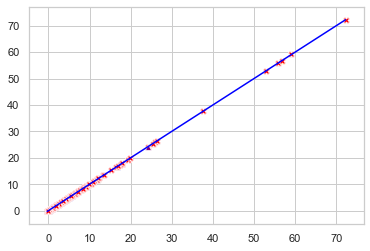

In [27]:
ax= plt.gca()
ax=sns.scatterplot(x=scores[passed1[:,0],0],y=scores[passed1[:,0],0],marker="^",color='green',ax=ax )
ax=sns.scatterplot(x=scores[failed1[:,0],0],y=scores[failed1[:,0],0],marker="X",color='red',ax=ax )
ax=sns.scatterplot(x=scores[passed2[:,0],0],y=scores[passed2[:,0],0],marker="^",color='blue',ax=ax )
ax=sns.scatterplot(x=scores[failed2[:,0],0],y=scores[failed2[:,0],0],marker="X",color='red',ax=ax )
ax=sns.scatterplot(x=scores[passed3[:,0],0],y=scores[passed3[:,0],0],marker="^",color='grey',ax=ax )
ax=sns.scatterplot(x=scores[failed3[:,0],0],y=scores[failed3[:,0],0],marker="X",color='red',ax=ax )
ax=sns.scatterplot(x=scores[passed4[:,0],0],y=scores[passed4[:,0],0],marker="^",color='orange',ax=ax )
ax=sns.scatterplot(x=scores[failed4[:,0],0],y=scores[failed4[:,0],0],marker="X",color='red',ax=ax )
ax=sns.scatterplot(x=scores[passed5[:,0],0],y=scores[passed5[:,0],0],marker="^",color='yellow',ax=ax )
ax=sns.scatterplot(x=scores[failed5[:,0],0],y=scores[failed5[:,0],0],marker="X",color='red',ax=ax )
ax=sns.scatterplot(x=scores[passed6[:,0],0],y=scores[passed6[:,0],0],marker="^",color='purple',ax=ax )
ax=sns.scatterplot(x=scores[failed6[:,0],0],y=scores[failed6[:,0],0],marker="X",color='red',ax=ax )
x_boundary = np.array([np.min(X[:,1]),np.max(X[:,1])])
y_boundary =(theta[0]  * x_boundary)/theta[0]
sns.lineplot(x= x_boundary, y= y_boundary, color= 'blue')

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=15)
print(X_train.shape)
print(X_test.shape)
#print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
#print(y_valid.shape)
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')
log_reg.fit(X_train, y_train)
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_
#Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

(35679, 2)
(3965, 2)
(35679, 1)
(3965, 1)
The Training Accuracy is:  0.9471397740968076
The Testing Accuracy is:  0.946279949558638
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     33793
           1       0.00      0.00      0.00      1886

   micro avg       0.95      0.95      0.95     35679
   macro avg       0.47      0.50      0.49     35679
weighted avg       0.90      0.95      0.92     35679



/Users/davidgae/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidgae/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
#def predict(theta,x):
#    results= x.dot(theta)
#    return results
#p= predict(theta,X)
#print("training accuracy:",sum(p==y)[0],"%")

In [14]:
# Visualizing cm

#cm = confusion_matrix(y_train, y_pred)
#cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

#plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')